# MLBA homework3

In [24]:
# Some utilities
using DSP
using Plots
using LinearAlgebra
using DelimitedFiles
using CSV
using Tables

## Q1 

plot frog trace
* idea： 用當下站的點之座標，預測下一步跳的座標
* 長大和actual trace用的都是n_now

In [25]:
function f_coef(a, b)
    ans = [1]
    for i in 1:b
        a_1 = a[2*i-1]
        a_2 = a[2*i]
        coef = [a_1, -a_2]
        ans = conv(ans, coef)
    end
    return ans
end
#coef = f_coef(a, b)

function f_0(coef, X)
    ans = []
    len = length(coef)
    n = len
    for i in 1:len
        ans = push!(ans, X^(n-1)) # x^3, x^2...
        n -= 1
    end
    return ans'*coef
end

function f_1(coef, Z)
    ans = []
    n = length(coef) - 1 # 3
    for i in 1:(length(coef) - 1)
        ans = push!(ans, coef[i]*n)
        n -= 1
    end
    X = []
    nn = length(coef) - 1 # 3
    for i in 1:(length(coef)-1)
        X = push!(X, Z^(nn-1)) # x^2, x^1, x^0
        nn -= 1
    end
    return ans'*X
end

function f_2(coef, Z)
    ans = []
    n = length(coef) - 1 # 3
    for i in 1:(length(coef) - 2)
        ans = push!(ans, coef[i]*n*(n-1))
        n -= 1
    end
    X = []
    nn = length(coef) - 1 # 3
    for i in 1:(length(coef)-2)
        X = push!(X, Z^(nn-2)) # x^1, x^0
        nn -= 1
    end
    return ans'*X
end

function actual_trace(input)
    ans = []
    for i in 1: length(input)
        ans = push!(ans, f_0(coef, input[i]))
    end
    plot(input, ans, label = "Actual Trace", color = "black", width = 3, title = "Freg we love you!", 
    xlabel = "X value", ylabel = "Y value", legend=:bottomright)
end
#Actual_trace = actual_trace([start_x: (end_x-start_x)/ (n_now-1): end_x; ])

function child_trace(input )
    ans = []
    ans = push!(ans, f_0(coef, start_x))
    for i in 1: (length(input)-1)
        r= f_0(coef, input[i])+f_1(coef, input[i])*(input[i+1]- input[i])
        ans = push!(ans, r)
    end
    scatter!(input, ans, name="Children", label = "")
    plot!(input, ans, label = "Children", color = "blue", width = 1.5)
    #return ans
end
#children_trace = child_trace([start_x: (end_x-start_x)/ (n_child-1): end_x; ])

function current_trace(input )
    ans = []
    ans = push!(ans, f_0(coef, start_x))
    for i in 1: (length(input)-1)
        r= f_0(coef, input[i])+f_1(coef, input[i])*(input[i+1]- input[i]) + 0.5*f_2(coef, input[i])*(input[i+1]- input[i])^2
        ans = push!(ans, r)
    end
    scatter!(input, ans, name="Current", label = "")
    plot!(input, ans, label = "Current", color = "green", width = 1.5)
    #return ans
end
#Current_trace = current_trace([start_x: (end_x-start_x)/ (n_now-1): end_x; ])
        


current_trace (generic function with 1 method)

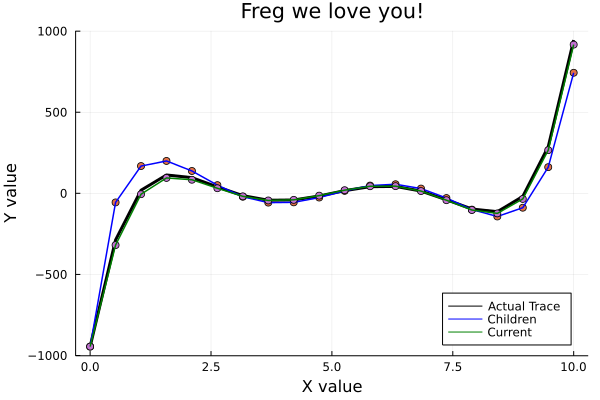

In [26]:
# test a
a = [1, 1, 1, 3, 1, 5, 1, 7, 1, 9]; b = 5; c = 0; d = 1;
n_now = 20; start_x = 0; end_x = 10;
n_child = round((n_now - c)/d, digits=0);

coef = f_coef(a, b)
Actual_trace = actual_trace([start_x: (end_x-start_x)/ (n_now-1): end_x; ])
children_trace = child_trace([start_x: (end_x-start_x)/ (n_child-1): end_x; ])
Current_trace = current_trace([start_x: (end_x-start_x)/ (n_now-1): end_x; ])


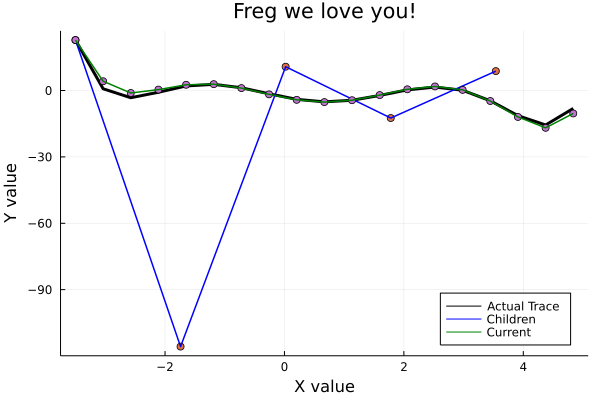

In [27]:
# test b
a = [1/2, 3/2, 1/3, -1, 1/2, 1, 1/2, -1, 2/5, 2, 2, -1]; b = 6; c = 7; d = 2;
n_now = 20; start_x = -3.5; end_x = 5.3;
n_child = round((n_now - c)/d, digits=0);

coef = f_coef(a, b)
Actual_trace = actual_trace([start_x: (end_x-start_x)/ (n_now-1): end_x; ])
children_trace = child_trace([start_x: (end_x-start_x)/ (n_child-1): end_x; ])
Current_trace = current_trace([start_x: (end_x-start_x)/ (n_now-1): end_x; ])


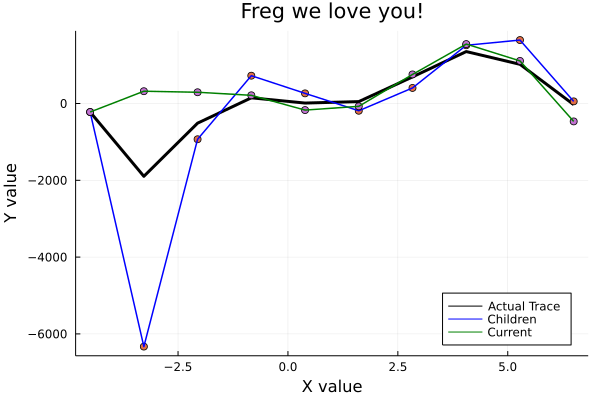

In [28]:
# test c
a  = [1.73, 0.8, 0.253, -0.347, 0.88, 1.24, 2.384, -10.83, 0.537, 3.456, 0.923, 
6.34];
b = 6; c = 0; d = 1; n_now = 10; start_x = -4.5; end_x = 6.5;
n_child = round((n_now - c)/d, digits=0);

coef = f_coef(a, b)
Actual_trace = actual_trace([start_x: (end_x-start_x)/ (n_now-1): end_x; ])
children_trace = child_trace([start_x: (end_x-start_x)/ (n_child-1): end_x; ])
Current_trace = current_trace([start_x: (end_x-start_x)/ (n_now-1): end_x; ])

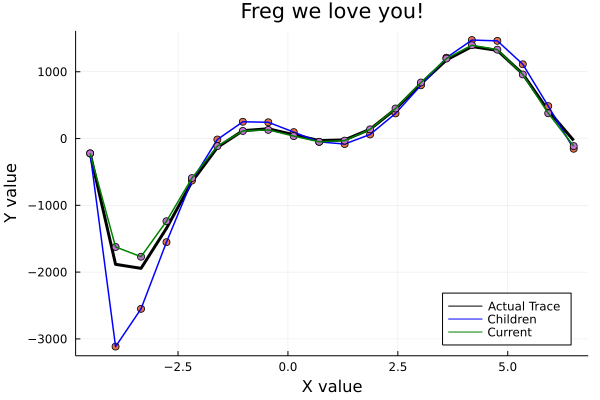

In [29]:
# test d
a = [1.73, 0.8, 0.253, -0.347, 0.88, 1.24, 2.384, -10.83, 0.537, 3.456, 0.923, 
6.34];
b = 6; c = 0; d = 1; n_now = 20; start_x = -4.5; end_x = 6.5;
n_child = round((n_now - c)/d, digits=0);

coef = f_coef(a, b)
Actual_trace = actual_trace([start_x: (end_x-start_x)/ (n_now-1): end_x; ])
children_trace = child_trace([start_x: (end_x-start_x)/ (n_child-1): end_x; ])
Current_trace = current_trace([start_x: (end_x-start_x)/ (n_now-1): end_x; ])

(e)
(1) d 的預測效果較好，因為泰勒展開式中，前一步跟下一步的距離，在test（d）較短，i.e. Z較為接近X。

(2)second order 的預測效果較好，因為有考慮到平方項，因此整體來說該逼近函數的誤差較小。

（3）Taylor approximation performs a bad approximation when my function looks bumpy

## Q2 

tolerance for grid search: 0.05 /0.1 here !
* 關於part A的圖，我試了幾個小時都沒辦法把線畫平整，即使寄很多信給eric，還是沒有解決我的問題。所以畫出來的圖緊緊差強人意。

In [30]:
function distance(Xk, p_w, C, theta) # a vector of len 3
    n = length(p_w) # of classes
    class = 0
    min_dis = 1000000
    for i in 1: n
        dis = log(p_w[i]) + 0.5*n*log(2*pi)-0.5*log(det(inv(C[i])))- 0.5*((Xk-theta[i])'*inv(C[i])*(Xk-theta[i]))
        if dis <= min_dis
            class = i
            min_dis = dis
        end
    end
    return class
end
# distance([20, 60, 100], p_w, C, theta)


distance (generic function with 1 method)

In [31]:
# Part I (a)
theta = [
    [80, 90, 100], 
    [50, 60, 70], 
    [20, 30, 40]
]
C = [
    [125 -75 45;
    -75 310 90;
    45 90 440], 
    [300 125 −400;
    125 750 −375;
    −400 −375 900], 
    [360 125 190;
    125 250 80;
    190 80 160]
]
p_w = [0.3, 0.25, 0.45]

score = readdlm("hw3data/Anny_M_score1.csv", ',', Float64)
lbl = []
for i in 1:size(score)[1]
    Xk = score[:,[2, 3, 4]]
    Xk = Xk[i,:]
    lbl = push!(lbl, distance(Xk, p_w, C, theta))
end
m = hcat([1:1:size(score)[1];], lbl)
CSV.write("hw3ans/Anny_classify_result1.csv", Tables.table(m), writeheader = false)

"hw3ans/Anny_classify_result1.csv"

In [32]:
# Part I (b)
theta = [
    [87.96, 61.85, 118.42], 
    [127.69, 116.18, 80.31],
    [74.90, 49.92, 92.98]
]
C = [
    [66.65 62.86 5.78;
    62.86 77.46 −8.41;
    5.78 −8.41 140.11
    ], 
    [161.54 53.49 39.35;
    53.49 177.16 64.00;
    39.35 64.00 159.26
    ], 
    [29.93 27.92 12.57;
    27.92 35.09 1.90;
    12.57 1.90 137.73]
]
p_w = [0.2, 0.5, 0.3]

score = readdlm("hw3data/Anny_M_score2.csv", ',', Float64)
lbl = []
for i in 1:size(score)[1]
    Xk = score[:,[2, 3, 4]]
    Xk = Xk[i,:]
    lbl = push!(lbl, distance(Xk, p_w, C, theta))
end
m = hcat([1:1:size(score)[1];], lbl)
CSV.write("hw3ans/Anny_classify_result2.csv", Tables.table(m), writeheader = false)

"hw3ans/Anny_classify_result2.csv"

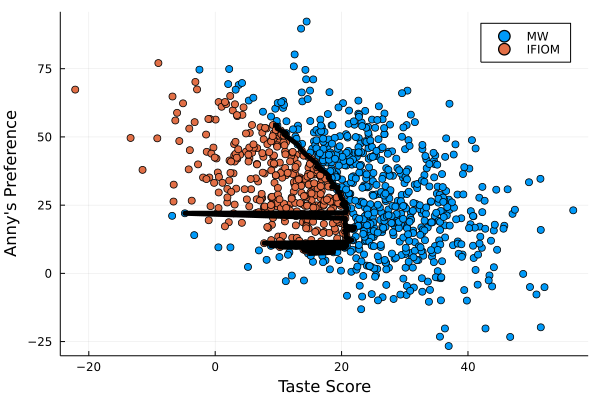

In [35]:
# Part II (a)
function grid_search(Xk, p_w, C, theta, tol::Float64) # a vector of len 3
    n = length(p_w) # of classes
    min_dis = 1000000
    class = 0
    for i in 1: n
        dis = log(p_w[i]) + 0.5*n*log(2*pi)-0.5*log(det(inv(C[i])))- 0.5*((Xk-theta[i])'*inv(C[i])*(Xk-theta[i]))
        if abs(dis-min_dis) < tol # hyperparameter
            class = 5
        end
        min_dis = dis
    end
    return class
end

function sort_by_sec_element(vec)
    sec_element = [] 
    for i in 1: size(vec[1])[1]
        y = vec[1][i][2]
        sec_element = push!(sec_element, y)
    end
    sec_element = sort(sec_element)
    ans = []
    for i in 1: size(sec_element)[1]
        for j in 1: size(vec[1])[1]
            if vec[1][j][2] == sec_element[i]
                ans = push!(ans, vec[1][j])
            end
        end
    end
    return ans
end

theta = [[20, 30], [50, 60]]
C = [
    [125 −75;
    −75 310], 
    [300 125;
    125 750]
]
p_w = [0.3, 0.7]

score = readdlm("hw3data/death_threat1.csv", ',', Float64)
lbl = []
bijin = []
for i in 1:size(score)[1]
    Xk = score[:,[2, 3]]
    Xk = Xk[i,:]
    lbl = push!(lbl, distance(Xk, p_w, C, theta))
    bijin = push!(bijin, grid_search(Xk, p_w, C, theta, 0.05))
end
m = hcat(score[:,[2, 3]], lbl, bijin)

grps  = [[m[i,:] for i=1:size(m)[1] if m[:,[3]][i] == j] for j=1:2]
grps2 = [[m[i,:] for i = 1: size(m)[1] if m[:,[4]][i] == j] for j = 5]
grps2 = sort_by_sec_element(grps2)
scatter([c[1] for c in grps[1]], [c[2] for c in grps[1]], xlabel= "Taste Score", ylabel= "Anny's Preference", label = "MW")
scatter!([c[1] for c in grps[2]], [c[2] for c in grps[2]], label = "IFIOM")
#plot!([c[1] for c in grps2], [c[2] for c in grps2])
plot!([c[1] for c in grps2], [c[2] for c in grps2], width = 5, color = "black", label = "")

        

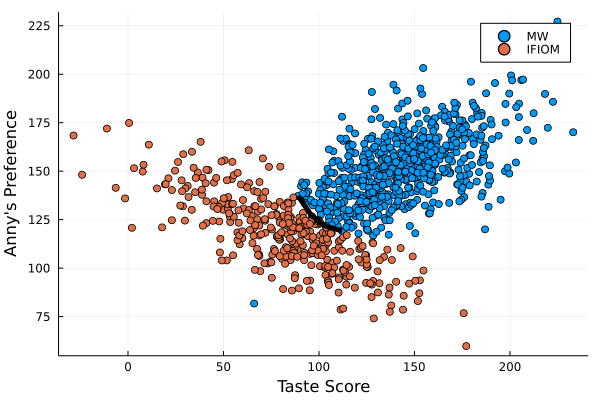

In [36]:
# Part II (b)
theta = [[80, 120], [140, 150]]
C = [
    [   1225 −525;
        −525 400], 
    [   900 390;
        390 400]
]
p_w = [0.4, 0.6]

score = readdlm("hw3data/death_threat2.csv", ',', Float64)
lbl = []
bijin = []
for i in 1:size(score)[1]
    Xk = score[:,[2, 3]]
    Xk = Xk[i,:]
    lbl = push!(lbl, distance(Xk, p_w, C, theta))
    bijin = push!(bijin, grid_search(Xk, p_w, C, theta, 0.1))
end
m = hcat(score[:,[2, 3]], lbl, bijin)

grps  = [[m[i,:] for i=1:size(m)[1] if m[:,[3]][i] == j] for j=1:2]
grps2 = [[m[i,:] for i = 1: size(m)[1] if m[:,[4]][i] == j] for j = 5]
grps2 = sort_by_sec_element(grps2)
scatter([c[1] for c in grps[1]], [c[2] for c in grps[1]], xlabel= "Taste Score", ylabel= "Anny's Preference", label = "MW")
scatter!([c[1] for c in grps[2]], [c[2] for c in grps[2]], label = "IFIOM")
#plot!([c[1] for c in grps2], [c[2] for c in grps2])
plot!([c[1] for c in grps2], [c[2] for c in grps2], width = 5, color = "black", label = "")

# Part II (c)

這個分類器的效果看似還不錯，大部分都有分到正確的組別。
然而在組別之間的分際有點模糊，從第二張圖很明顯地可以觀察到一個問題： 邊際線的threshold需要提高，才能看到線，表示這個分類器的外推性有待加強。

* 解決方法
根據樣本數、組別等變數，訓練一個自動調整tolerance的模型，使得分類器能在邊緣的分類表現更好！（ie. 加重邊際線的分類加權coefficient。）

## Q3 

In [37]:
function gram_schmidt(a; tol = 1e-10)
    q = []
    for i = 1:length(a)
        qtilde = a[i]
        for j = 1:i-1
            qtilde -= (q[j]'*a[i]) * q[j]
        end
        
        if norm(qtilde) < tol
            println("Vectors are linearly dependent.")
            return q
            return ""
        end
        push!(q, qtilde/norm(qtilde))
    end;
    return q # all the orthonormal vectors in a sets
end
# a = [ [2,0,0], [0,1,2], [1, 2,3] ]
# q = gram_schmidt(a)

gram_schmidt (generic function with 1 method)

In [18]:
# test a
matrix = readdlm("hw3data/Metaverse_input1.csv", ',', Float64)
c = matrix[:,[5]] # 轉換前的c‘
matrix = matrix[:,[1,2,3,4]]
q = gram_schmidt([matrix[:,1], matrix[:,2], matrix[:,3], matrix[:,4]])
q = [round.(q[i], digits = 4) for i in 1:4]
new_m = hcat(q[1], q[2], q[3], q[4])
m = hcat(new_m, new_m*(inv(matrix)*c))

CSV.write("hw3ans/Metaverse_output1.csv", Tables.table(m), writeheader = false)

"hw3ans/Metaverse_output1.csv"

In [19]:
# test b
matrix = readdlm("hw3data/Metaverse_input2.csv", ',', Float64)
c = matrix[:,[5]] # 轉換前的c‘
matrix = matrix[:,[1,2,3,4]]
q = gram_schmidt([matrix[:,1], matrix[:,2], matrix[:,3], matrix[:,4]])
q = [round.(q[i], digits = 4) for i in 1:4]
new_m = hcat(q[1], q[2], q[3], q[4])
m = hcat(new_m, new_m*(inv(matrix)*c))

CSV.write("hw3ans/Metaverse_output2.csv", Tables.table(m), writeheader = false)

"hw3ans/Metaverse_output2.csv"

In [20]:
# test c
matrix = readdlm("hw3data/Metaverse_input3.csv", ',', Float64)
c = matrix[:,[5]] # 轉換前的c‘
matrix = matrix[:,[1,2,3,4]]
q = gram_schmidt([matrix[:,1], matrix[:,2], matrix[:,3], matrix[:,4]])
q = [round.(q[i], digits = 4) for i in 1:4]
new_m = hcat(q[1], q[2], q[3], q[4])
m = hcat(new_m, new_m*(inv(matrix)*c))

CSV.write("hw3ans/Metaverse_output3.csv", Tables.table(m), writeheader = false)

"hw3ans/Metaverse_output3.csv"

In [21]:
# test d
matrix = readdlm("hw3data/Metaverse_input4.csv", ',', Float64)
c = matrix[:,[5]] # 轉換前的c‘
matrix = matrix[:,[1,2,3,4]]
q = gram_schmidt([matrix[:,1], matrix[:,2], matrix[:,3], matrix[:,4]])
q = [round.(q[i], digits = 4) for i in 1:4]
new_m = hcat(q[1], q[2], q[3], q[4])
m = hcat(new_m, new_m*(inv(matrix)*c))

CSV.write("hw3ans/Metaverse_output4.csv", Tables.table(m), writeheader = false)

"hw3ans/Metaverse_output4.csv"

In [22]:
# test e
matrix = readdlm("hw3data/Metaverse_input5.csv", ',', Float64)
c = matrix[:,[5]] # 轉換前的c‘
matrix = matrix[:,[1,2,3,4]]
q = gram_schmidt([matrix[:,1], matrix[:,2], matrix[:,3], matrix[:,4]])
q = [round.(q[i], digits = 4) for i in 1:4]
new_m = hcat(q[1], q[2], q[3], q[4])
m = hcat(new_m, new_m*(inv(matrix)*c))

CSV.write("hw3ans/Metaverse_output5.csv", Tables.table(m), writeheader = false)

"hw3ans/Metaverse_output5.csv"